In [92]:
import pandas as pd

picher_file_path = './data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)

picher.columns
# picher.shape
# picher.head()

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [93]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

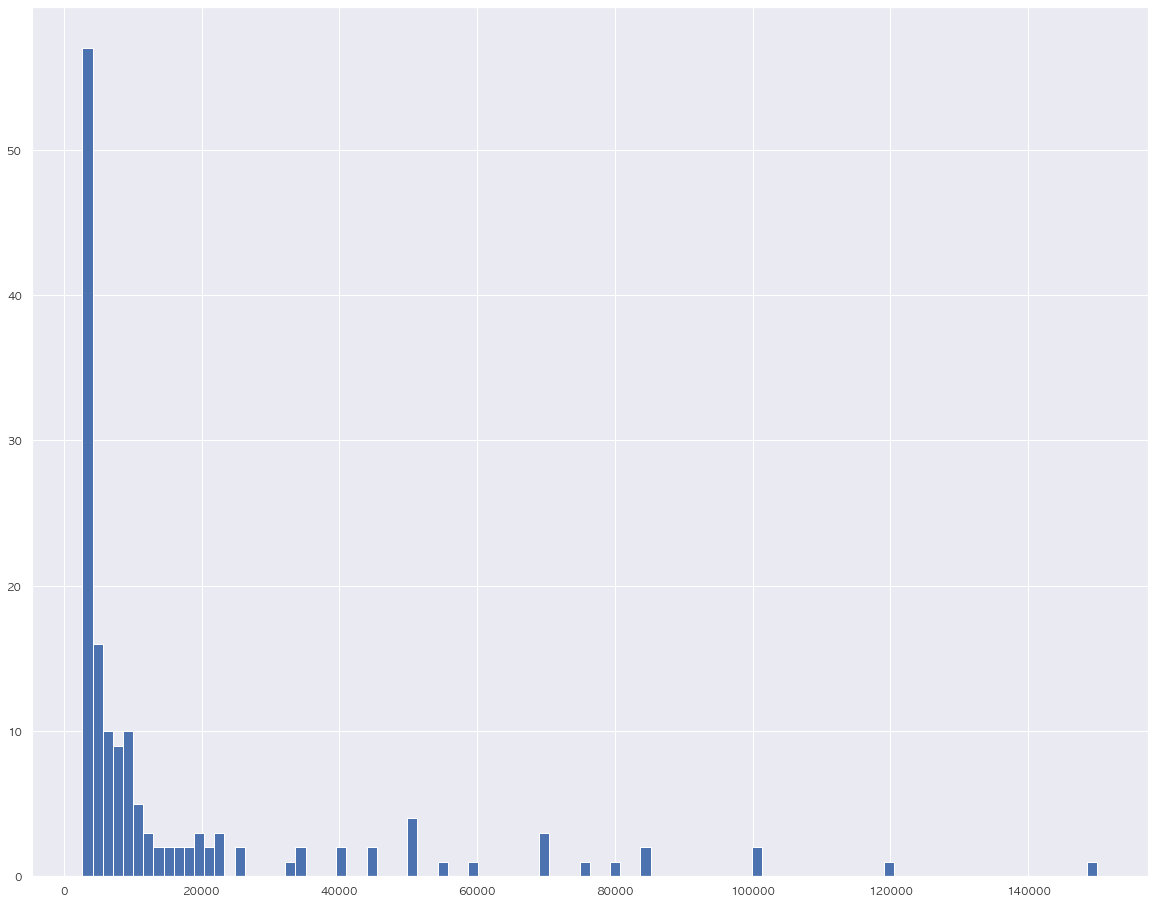

In [94]:
# 히스토그램으로 표현

picher['연봉(2017)'].hist(bins = 100)

<AxesSubplot:>

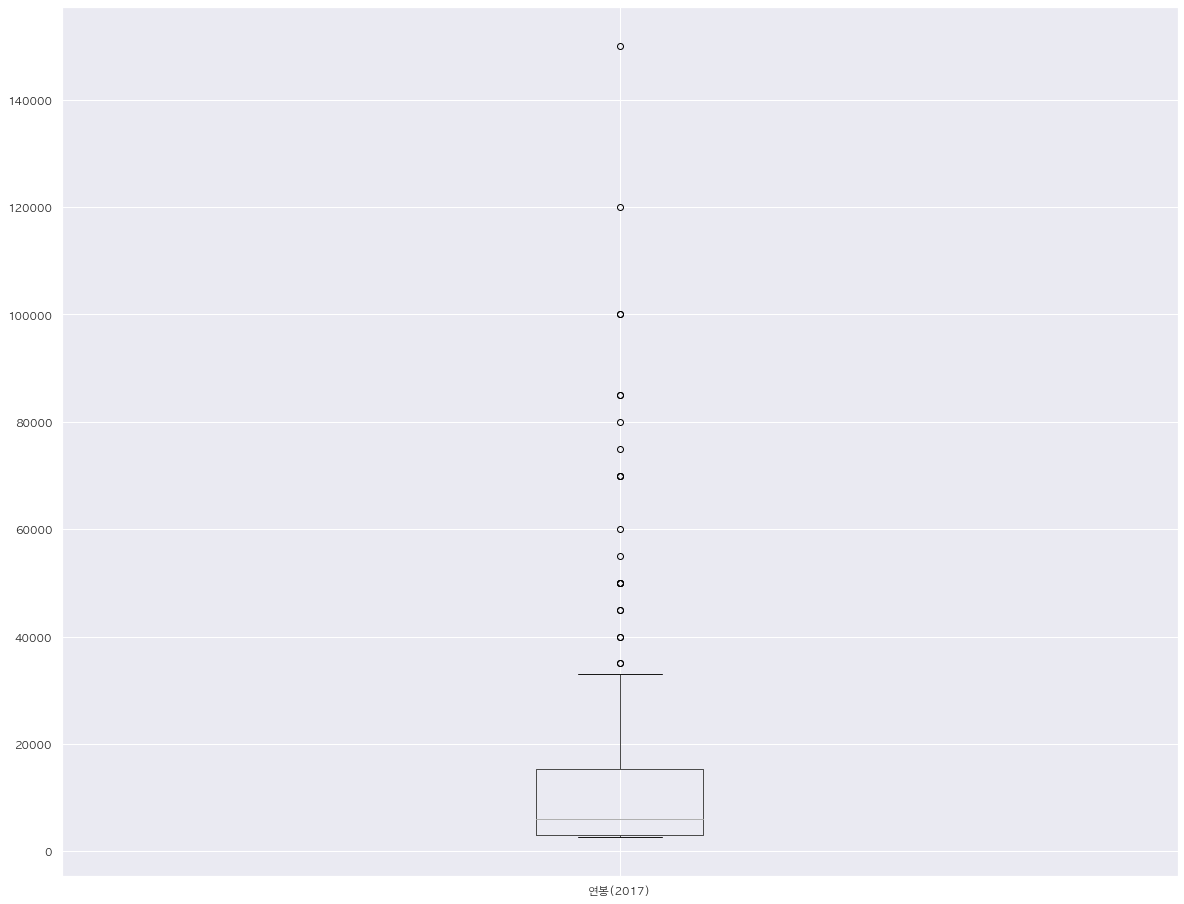

In [119]:
picher.boxplot(column = ['연봉(2017)'])

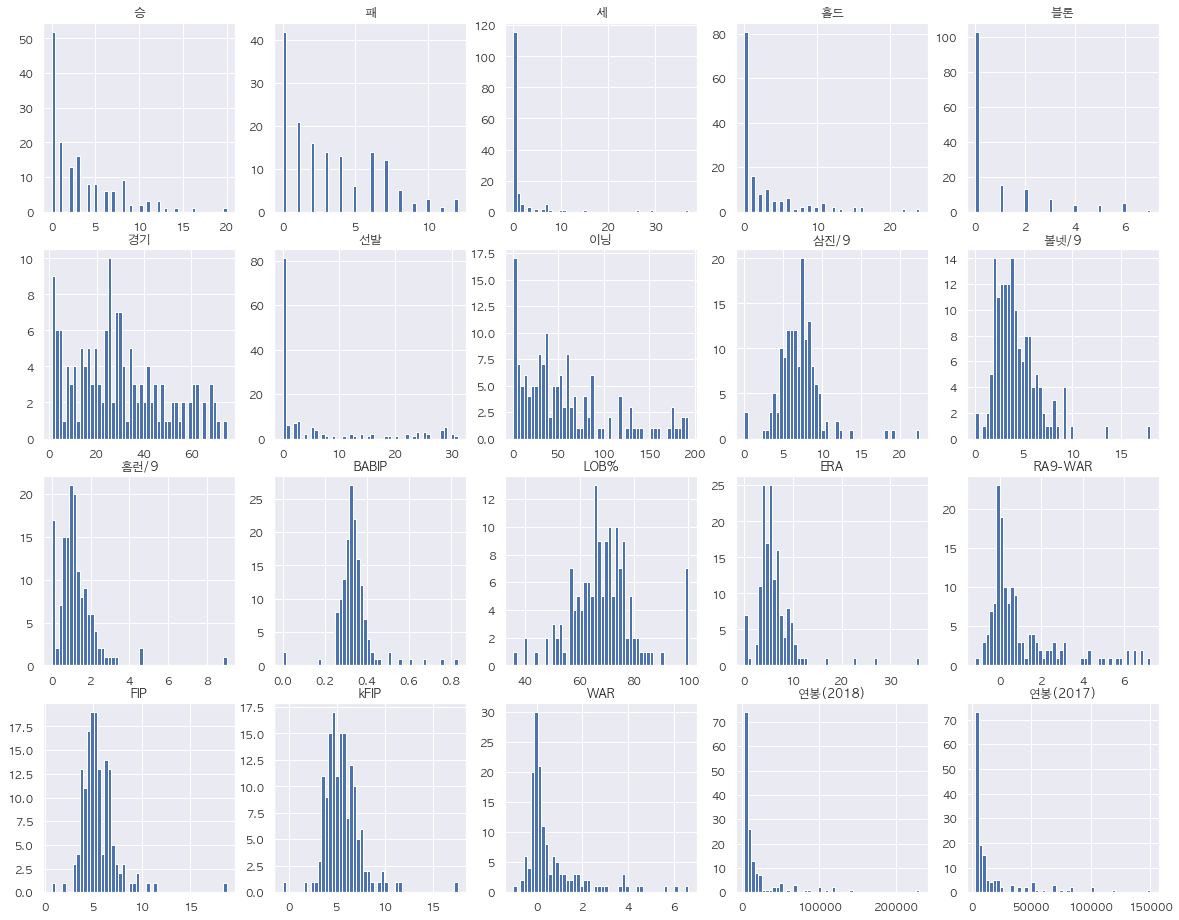

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]
# picher_features_df.info()

def plot_hist_each_columns(df):
    plt.rc('font', family = 'AppleGothic')
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4,5,i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()        
plot_hist_each_columns(picher_features_df)        

In [97]:
# 피쳐 스케일링

def standard_scailing(df, scale_columns):
    temp_df = df.copy()
    for col in scale_columns:
        series_mean = temp_df[col].mean()
        series_std = temp_df[col].std()
        temp_df[col] = temp_df[col].apply(lambda x: (x-series_mean)/series_std)
    return temp_df    
    
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2017)']
picher_df = standard_scailing(picher, scale_columns)

In [98]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [99]:
pd.options.mode.chained_assignment = None
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [100]:
# rename 메서드

picher_df = picher_df.rename(columns = {'연봉(2018)' : 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [101]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [102]:
picher_df = picher_df.join(team_encoding)
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [103]:
X = picher_df[picher_df.columns.difference(['선수명','y'])]
X.shape

(152, 28)

In [104]:
y = picher_df['y']       # 1차원 시리즈 객체
print(y.shape)
y.head()

(152,)


0    140000
1    120000
2    230000
3    100000
4    111000
Name: y, dtype: int64

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)  # 8대 2의 비율
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(121, 28) (121,)
(31, 28) (31,)


In [106]:
X_train.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
94,0.544959,0.708951,-0.548806,1,0,0,-2.460666,0,-0.665457,0,...,-0.105959,-0.624825,-0.306452,-0.827554,-0.463349,-1.052812,-1.008613,0,-0.585705,-1.189625
118,-0.016931,-0.611056,0.386499,0,1,0,1.404205,0,-0.410536,0,...,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,-1.008613,0,-0.364245,0.776804
109,-0.185498,0.399349,1.022507,0,0,0,-0.079629,0,-0.584099,0,...,-0.311084,-0.317136,-0.306452,-0.568731,-0.547193,-0.909664,-0.689219,0,-0.585705,0.324526
5,-0.578820,-0.721456,-0.580874,0,1,0,0.653661,0,2.963100,0,...,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,2.185327,0,-0.585705,-0.088425
75,-0.084357,0.245749,-0.067792,1,0,0,-1.002712,0,-0.594947,0,...,-0.219131,-0.624825,-0.306452,-0.568731,-0.459357,-0.853995,-0.689219,0,0.300137,-0.560368


In [107]:
X_test.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
42,-0.264162,-0.507855,-0.671732,0,0,1,0.636407,0,0.213207,0,...,0.406852,-0.624825,-0.098502,-0.051084,-0.219802,-0.094516,-0.050431,0,4.729351,-0.176914
100,-0.972143,-0.455055,-0.110549,0,0,0,0.420734,0,-0.399688,0,...,-0.583404,-0.624825,-0.306452,-0.827554,-0.551186,-0.710848,-1.008613,1,-0.364245,0.039393
124,0.544959,-0.083053,0.514770,0,0,0,-0.278049,0,-0.849868,0,...,-0.477305,-0.419699,-0.306452,-0.568731,-0.419431,-0.535889,-1.008613,0,-0.585705,0.580161
27,-0.320351,-0.476655,-0.586218,0,0,0,0.248195,1,0.495248,0,...,0.594293,-0.317136,0.317397,0.466564,-0.020173,0.621223,-0.689219,0,0.743059,-0.186746


In [108]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745] 18640.472964544184


In [109]:
print('R2 = ')
print(model.score(X_train, y_train))
print(lr.score(X_test, y_test))

R2 = 
0.9276949405576705
0.8860171644977816


In [110]:
# RMSE = 평균 제곱근 오차(타겟값과 예측값의 차이를 나타내는 정략적 지표)

from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE = ')
print(sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print(sqrt(mean_squared_error(y_test, lr.predict(X_test))))

RMSE = 
7282.718684746374
14310.696436889144


In [111]:
!pip install statsmodels

In [112]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

#p-value가 0.05보다 작으면 통계적으로 유의미하다고 볼수 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           7.70e-42
Time:                        20:43:47   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

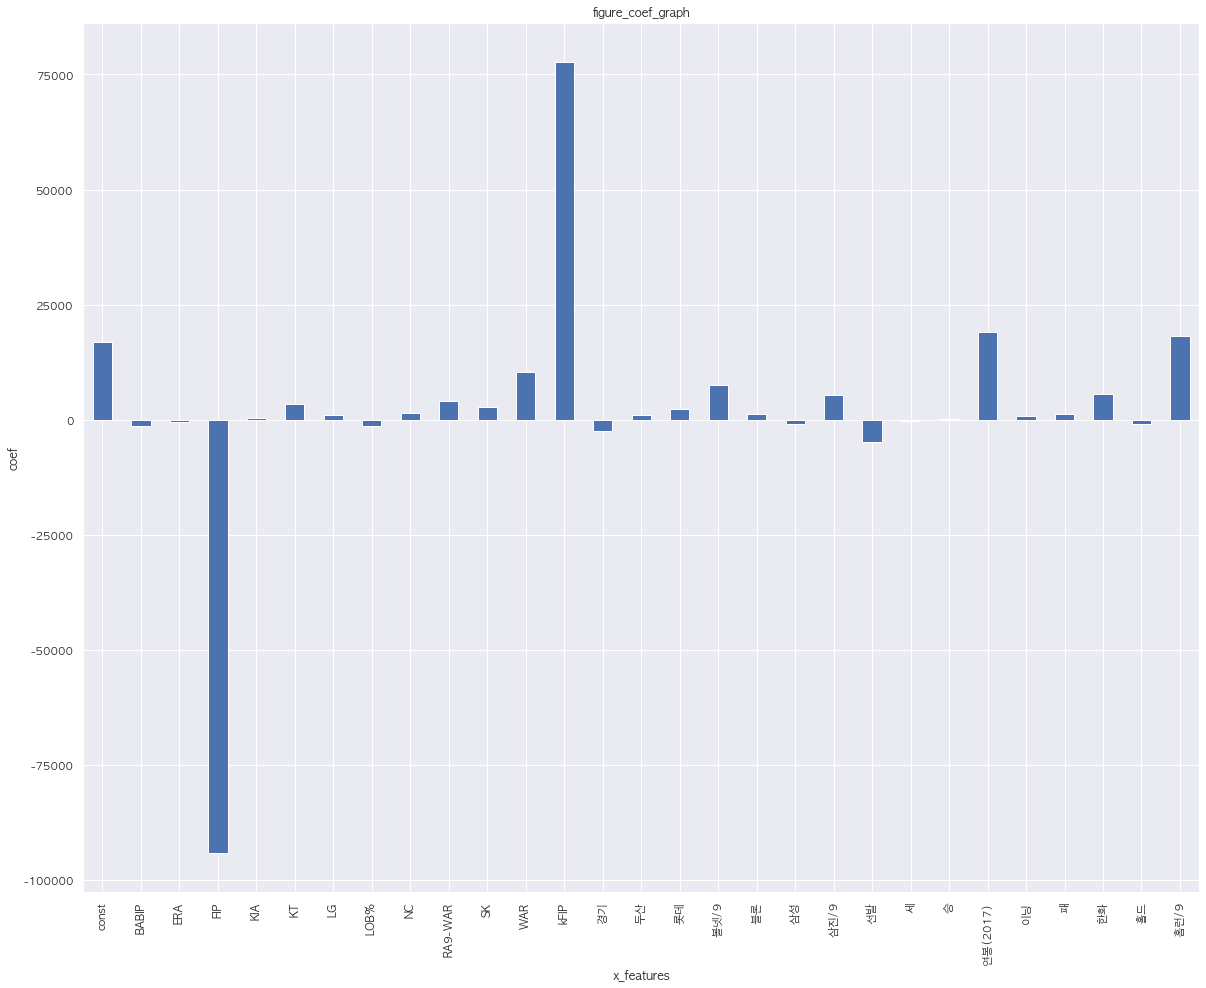

In [113]:
plt.rc('font', family = 'AppleGothic')
plt.rcParams['figure.figsize'] = [20,16]

coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind = 'bar')
ax.set_title('figure_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

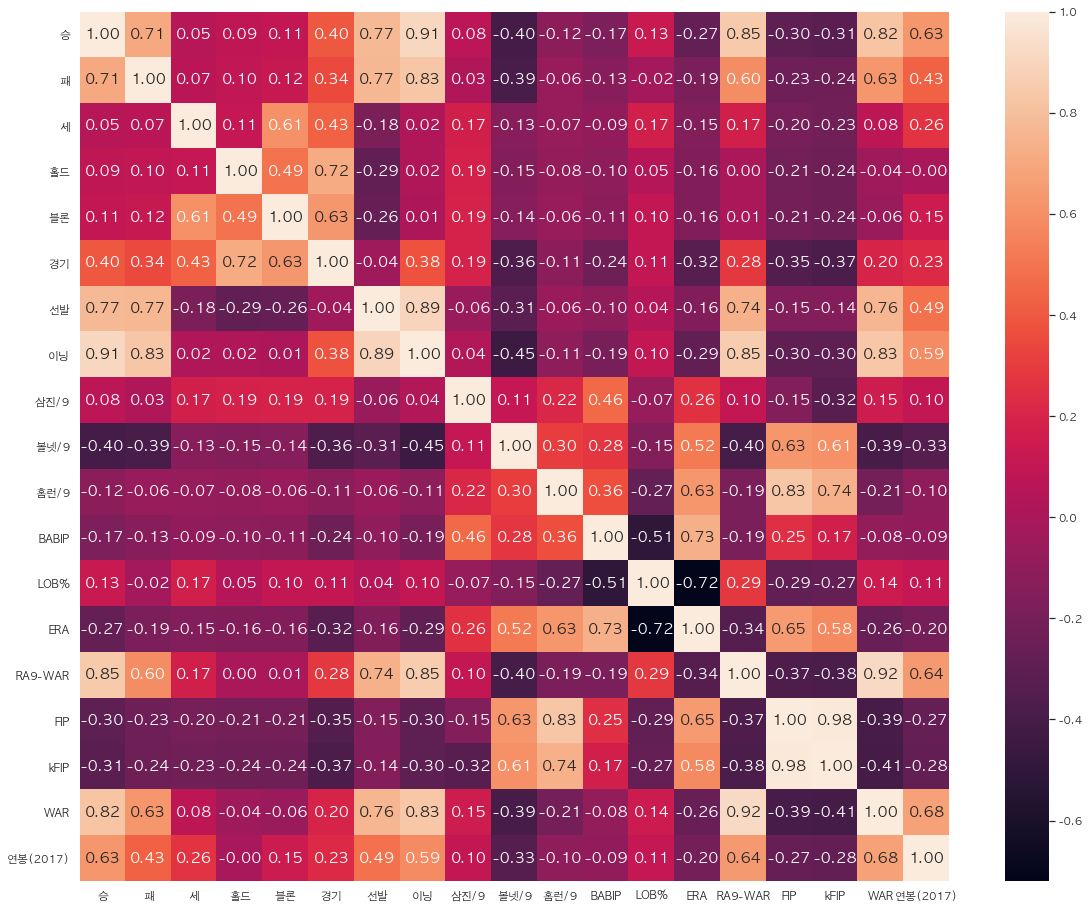

In [114]:
import seaborn as sns

corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = picher_df[scale_columns].columns.to_list()

sns.set(font = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square  = True,
                fmt = '.2f',
                annot_kws = {'size' : 15},
                yticklabels = show_cols,
                xticklabels = show_cols)
plt.show()

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(1)

,Features,VIF
0,BABIP,3.2
1,ERA,10.6
2,FIP,14238.3
3,KIA,1.1
4,KT,1.1
5,LG,1.1
6,LOB%,4.3
7,NC,1.1
8,RA9-WAR,13.6
9,SK,1.1


In [116]:
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

print('acc = ')
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print("----------------------------")

print('RMSE = ')
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

vif = pd.DataFrame()
vif['VIF FACTOR'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns
vif.round(1)
      
      

acc = 
0.9150591192570362
0.9038759653889865
----------------------------
RMSE = 
7893.462873347693
13141.86606359108


,VIF FACTOR,Features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [117]:
picher = pd.read_csv(picher_file_path)
result_df = picher[['선수명', '연봉(2017)', '연봉(2018)']]
result_df['예측연봉(2018)'] = pd.Series(lr.predict(X)).astype('int64')
result_df = result_df.sort_values(by = ['연봉(2018)'],ascending = False)
result_df.columns = ['선수명', '작년연봉(2017)', '실제연봉(2018)', '예측연봉(2018)']
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
print(result_df.shape)
result_df.head()

(128, 4)


,선수명,작년연봉(2017),실제연봉(2018),예측연봉(2018)
2,양현종,150000,230000,163930
0,켈리,85000,140000,120122
1,소사,50000,120000,88127
4,레일리,85000,111000,102253
5,피어밴드,35000,85000,58975


<AxesSubplot:xlabel='선수명'>

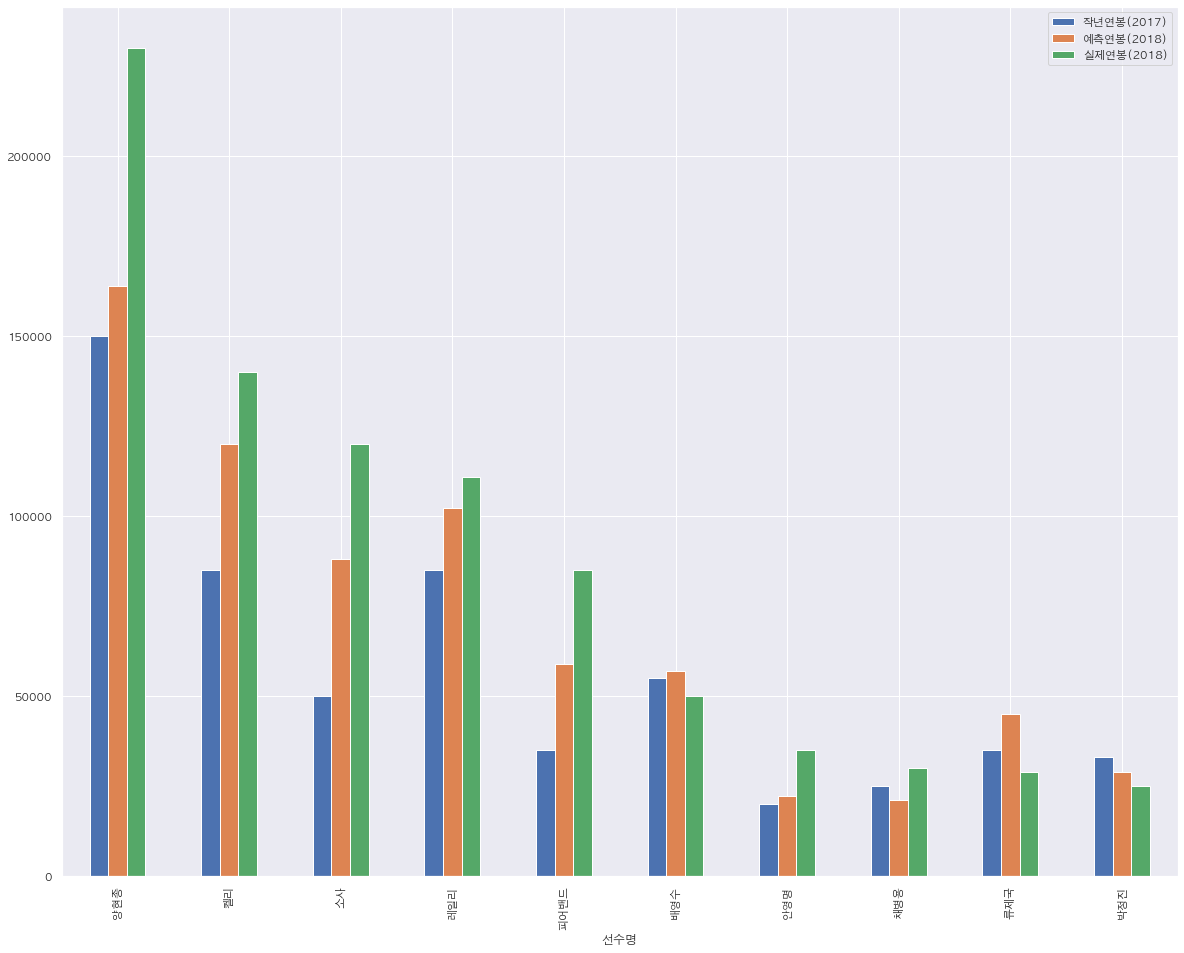

In [118]:
result_df = result_df.head(10)
plt.rc('font', family = 'AppleGothic')
result_df.plot(x='선수명', y = ['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind = 'bar')
